In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import numpy as np
from IPython.display import display, clear_output
import time
import math

In [2]:
class driver():
    """Creates a driver capable of picking up riders and taking them to their destination. Drivers may only have 1 rider at a
    time. """
    
    def __init__(self, x_dim, y_dim):
        """Defines a driver whose default location is randomly located within the dimensions of the world and who hasn't been
        hired and doesn't have a rider in their vehicle."""
        self.x = np.random.randint(0,x_dim)
        self.y = np.random.randint(0,y_dim)
        self.location = (self.x, self.y)
        self.has_rider = False   # True when rider is in their car
        self.my_rider = "None"   # Corresponds to rider from when the rider selects the driver until they've been dropped off.
        
    def move(self):
        """If the driver has a job, moves driver one position closer to their destination or picks up the rider. 
        (If they haven't picked up the rider yet, then their destination is the rider's location. If they 
        have picked up the rider, then their destination is the rider's destination.) The driver first will move right/left, and
        then up/down. (Note: Drivers do not pick up or drop off their passenger and move in the same iteration (i.e. Drivers will
        spend one iteration obtaining their rider.))
        """

        if self.my_rider != "None":       
            if self.has_rider == False:
                rider_x = self.my_rider.x
                rider_y = self.my_rider.y
                if self.x < rider_x:
                    self.x += 1
                    self.location = (self.x, self.y)
                elif self.x > rider_x:
                    self.x -= 1
                    self.location = (self.x, self.y)
                else:
                    if self.y < rider_y:
                        self.y += 1
                        self.location = (self.x, self.y)
                    elif self.y > rider_y:
                        self.y -= 1
                        self.location = (self.x, self.y)
                    else:
                        self.has_rider = True
            elif self.has_rider == True:
                dest_x = self.my_rider.x_dest
                dest_y = self.my_rider.y_dest
                if self.x < dest_x:
                    self.x += 1
                    self.my_rider.x += 1
                    self.location = (self.x, self.y)
                elif self.x > dest_x:
                    self.x -= 1
                    self.my_rider.x -= 1
                    self.location = (self.x, self.y)
                else:
                    if self.y < dest_y:
                        self.y += 1
                        self.my_rider.y += 1
                        self.location = (self.x, self.y)
                    elif self.y > dest_y:
                        self.y -= 1
                        self.my_rider.y -= 1
                        self.location = (self.x, self.y)                                            
        
    def draw(self):
        """Plots the driver green if they have a rider, red if they don't have a rider."""
        color = 'r'
        if (self.has_rider == True):
            color = 'g'
        plt.scatter(self.x, self.y, s = 80, color=color);
        

In [3]:
class rider():
    """Creates a driver capable of picking up riders and taking them to their destination. Drivers may only have 1 rider at a
    time. Once assigned to a rider, a driver will their rider directly to their destination immediately."""
    
    def __init__(self, x_dim, y_dim):
        """Defines a rider whose default location is randomly located within the dimensions of the world, who has a
        destination at another location, and who has no driver."""
        self.x = np.random.randint(0,x_dim)
        self.y = np.random.randint(0,y_dim)      
        self.location = (self.x, self.y)
        self.x_dest = np.random.randint(0,x_dim)
        self.y_dest = np.random.randint(0,y_dim)  
        self.destination = (self.x_dest, self.y_dest)
        # Still need to prevent possibility of location and destination being the same
        
    def closest_available_driver(self, available_drivers):
        """ Uses a a list of available drivers to calculate the distance between the rider and all available drivers and assigns
        the closest driver the following rider. Returns the closest driver and their location."""
        
        # Creates a list of driver locations.
        driver_locations = []
        for d in available_drivers:
            driver_locations.append(d.location)
            
        # Determines the nearest driver's location.
        shortest_dist = 99999
        for l in driver_locations:
            dist = math.sqrt( (l[0] - self.location[0])**2 + (l[1] - self.location[1])**2 )
            if dist < shortest_dist:
                shortest_dist = dist
                nearest_driver_location = l
        
        # Determines the nearest driver.
        for d in available_drivers:
            if d.location == nearest_driver_location:
                nearest_driver = d
                
        return nearest_driver, nearest_driver_location
    
    def draw(self):
        """Plots the rider yellow."""
        color = 'y'
        plt.scatter(self.x, self.y, s = 80, color=color)
    

In [4]:
def run(num_drivers = 2, rider_spawn_prob = 0.2, x_dim = 70, y_dim = 30, iterations = 100, vis = True):
    """Creates a world of size x_dim by y_dim with the specified number of drivers (red points) and runs a simulation in which
    riders (yellow points) and their destinations (red splotches) spawn according to the given rider spawn probability, riders
    select the closest driver, and said driver picks up the rider and drops them off at their destination."""
    
    # Initializes an empty array for the world and sets the animation dimensions
    world = np.zeros((x_dim,y_dim))
    fig, ax = plt.subplots(figsize=(30,15));
    
    # Creates a list of drivers and available drivers
    drivers = [driver(x_dim,y_dim) for a in range(0,num_drivers)]
    available_drivers = []
    for d in drivers:
        available_drivers.append(d)
    
    # Create an empty list for riders
    riders = []
    
    
    iterations_ran = 0
    
    while iterations_ran < iterations:
        
        if rider_spawn_prob > random.random():
            
            # A new rider & their destination spawn
            new_rider = rider(x_dim,y_dim)   
            riders.append(new_rider)
            destination = new_rider.destination
            world[destination] = 15
            
            # Assigns the closest available driver to the rider, if there is an available driver.
            if available_drivers != []:
                closest_driver, closest_driver_location = new_rider.closest_available_driver(available_drivers)
                #print("The rider at {} is closest to the driver at {}".format(new_rider.location, closest_driver_location))
                closest_driver.my_rider = new_rider
                available_drivers.remove(closest_driver)
        
        # For each driver, if they have a job move towards their destination.
        for d in drivers:
            #print("A driver is at {}".format(d.location))
            # If the driver has a job, move one step closer to their destination (the rider or the rider's destination).  
            d.move()            
            #print("The driver is now at {}".format(d.location))
        
        # If a driver has the rider and is at their destination, drop the rider off and remove them from the animation.
        for d in drivers:
            if d.my_rider != "None":
                if d.my_rider.destination == d.location:
                    riders.remove(d.my_rider)
                    world[d.my_rider.destination] = 0
                    d.has_rider = False
                    d.my_rider = "None"
                    available_drivers.append(d)
        
        iterations_ran += 1
        
        if vis == True:
            # Plots the world
            plt.imshow(world.T, origin='lower', aspect='equal');
            for r in range(0,len(riders)):
                riders[r].draw()
            for d in range(0,num_drivers):
                drivers[d].draw()

            # Allows animation
            clear_output(wait=True) # Clear output for dynamic display
            display(fig)            # Reset display
            fig.clear()             # Prevent overlapping and layered plots
            time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
    

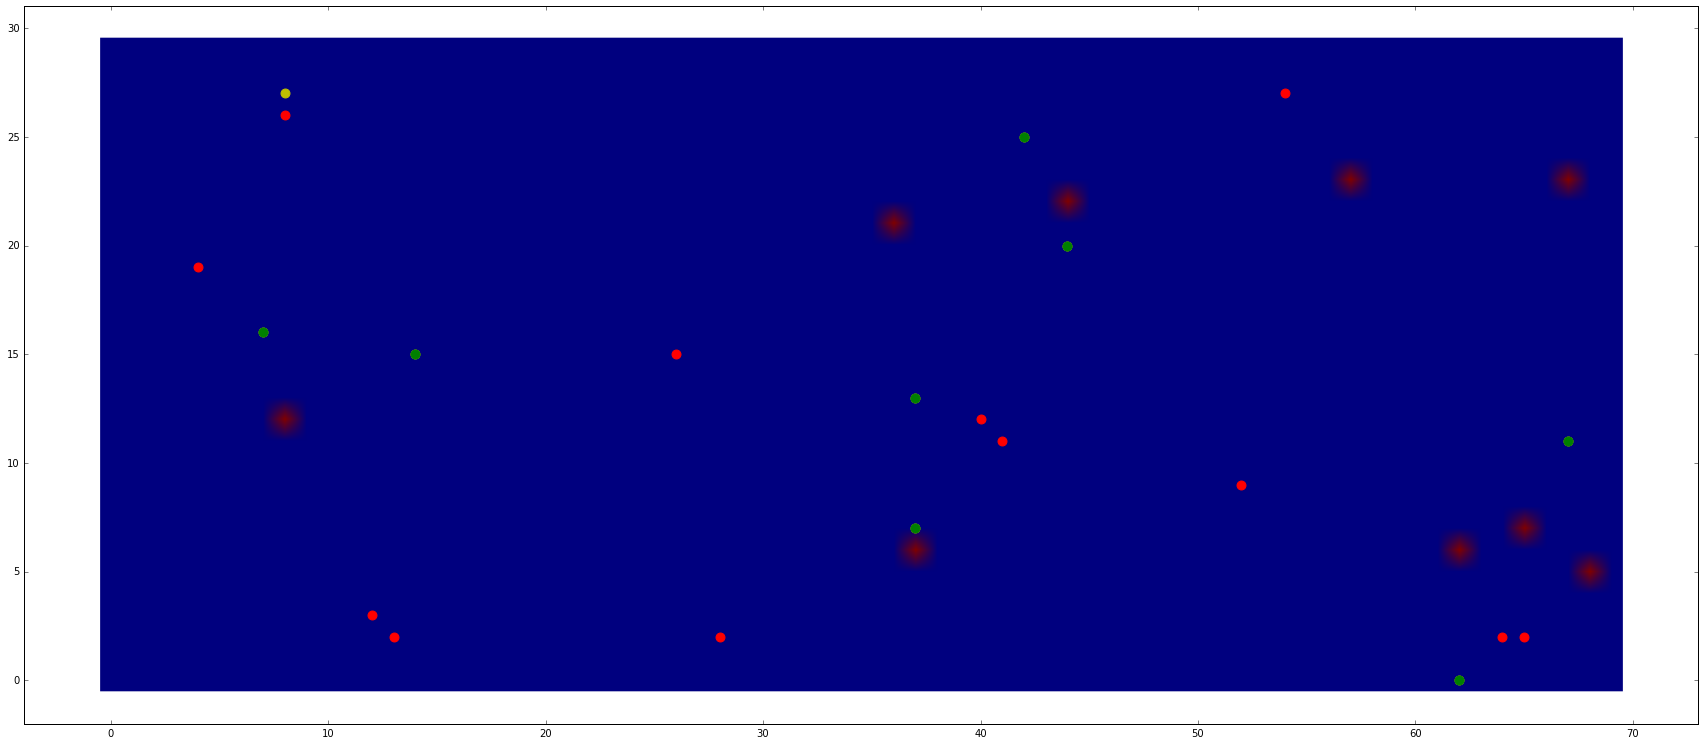

In [6]:
run(num_drivers = 20)
# drivers = red points, riders = yellow points, & destinations = red splotches


Red Points: Drivers without passenger  
Green Points: Drivers with passenger  
Yellow Points: Passenger waiting to be picked up  
Red Splotches: Passenger destination

***Extra Ideas***

-Would it be nice to compare the costs of having drivers being able to change the rider that they're moving towards for a more efficient system?    
    
-Try using nearest neighbor algorithm to speed up driver selection of rider

-It may make sense to create an additional list of only the visible riders (i.e. those that aren't being driven). Currently drivers are just drawn over their riders.

-Remember to remove riders that have been dropped off from the riders list so they aren't plotted!

-Consider making the visualization a separate function (that can be turned on or off (so that you can collect data faster).

MO:
- Spawn drivers
- Iteratively,
   - Rider may or may not spawn
   - When rider spawns, 
       - Calculate distances between rider and each available driver.
       - Determine closest driver
       - Set the closest driver's destination to the rider's location. (Once assigned to a rider, a driver will take their rider 
         directly to their destination immediately.) 
       - Each driver travels towards their rider's location (if they have a job) or stays put
       - ...
   - 
   
Wait time = amount of time rider waits after driver has been selected (Use self.has_rider and self.my_rider to calculate this.)

Drive time = amount of interations it takes to get to the destination (Use self.has_rider and self.my_rider to calculate this.)